In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")
pokemondf = pd.read_csv("pokemon.csv")

In [4]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='age', ylabel='count'>

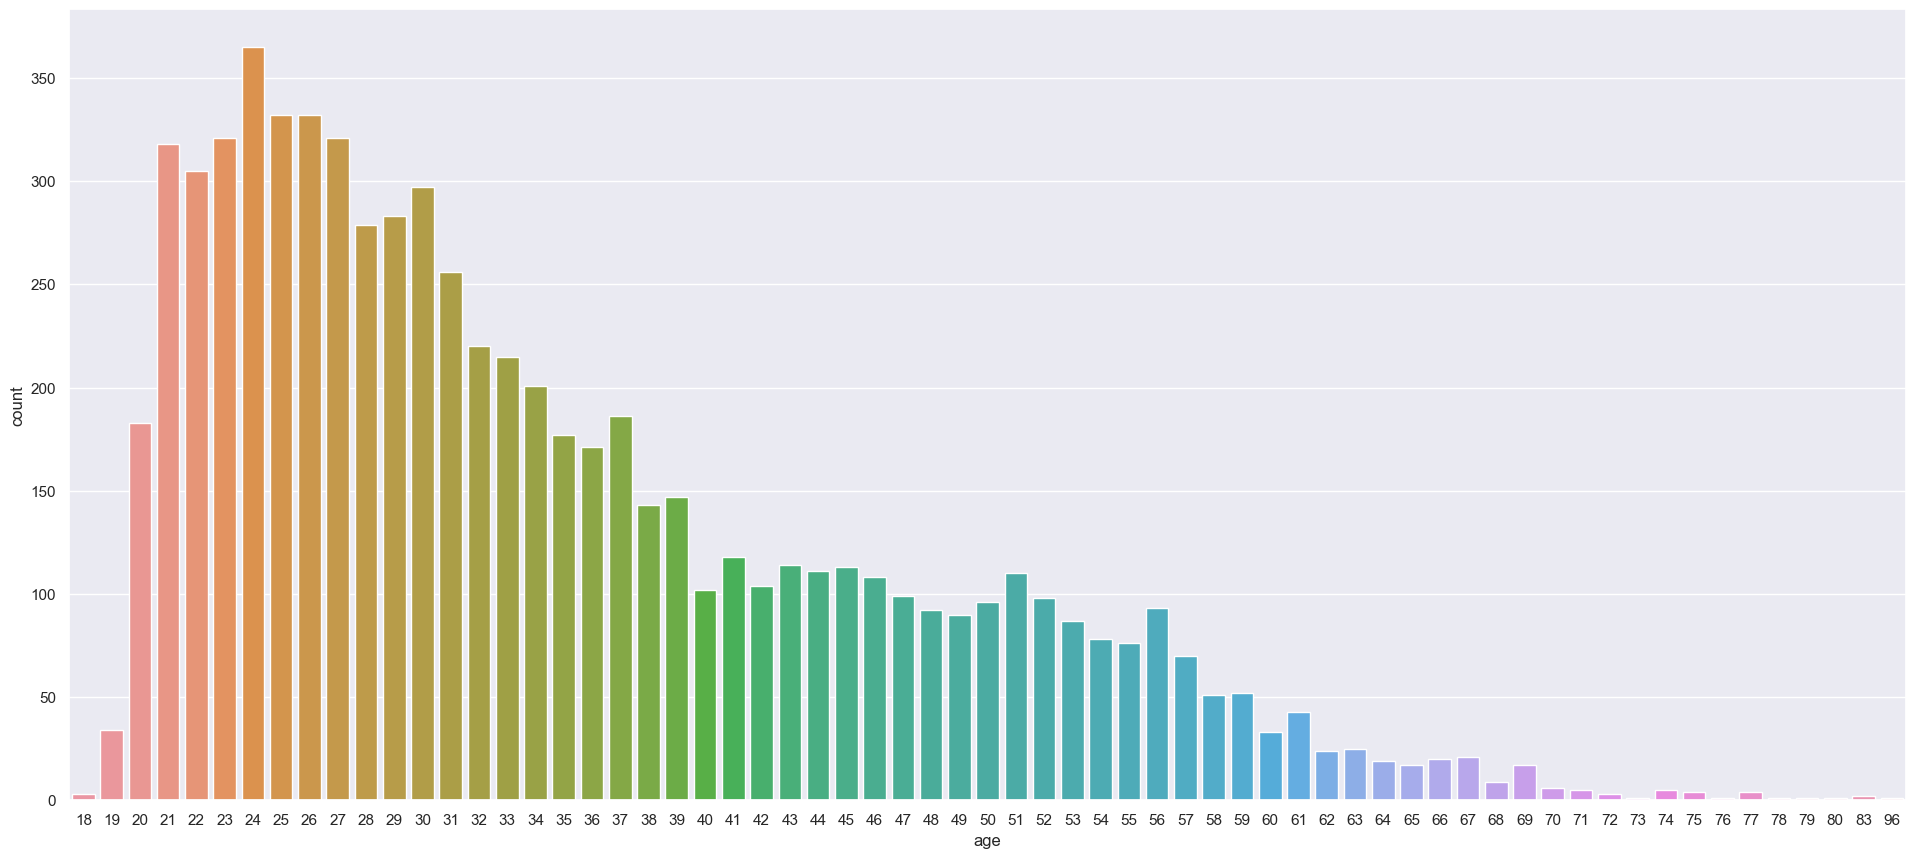

In [5]:
sns.set(rc={'figure.figsize':(23.7,10.27)})
sns.countplot(x=df["age"])

There are 1576 people older than 45
There are 4109 people older than 25, younger than 45
There are 1529 people younger than 25


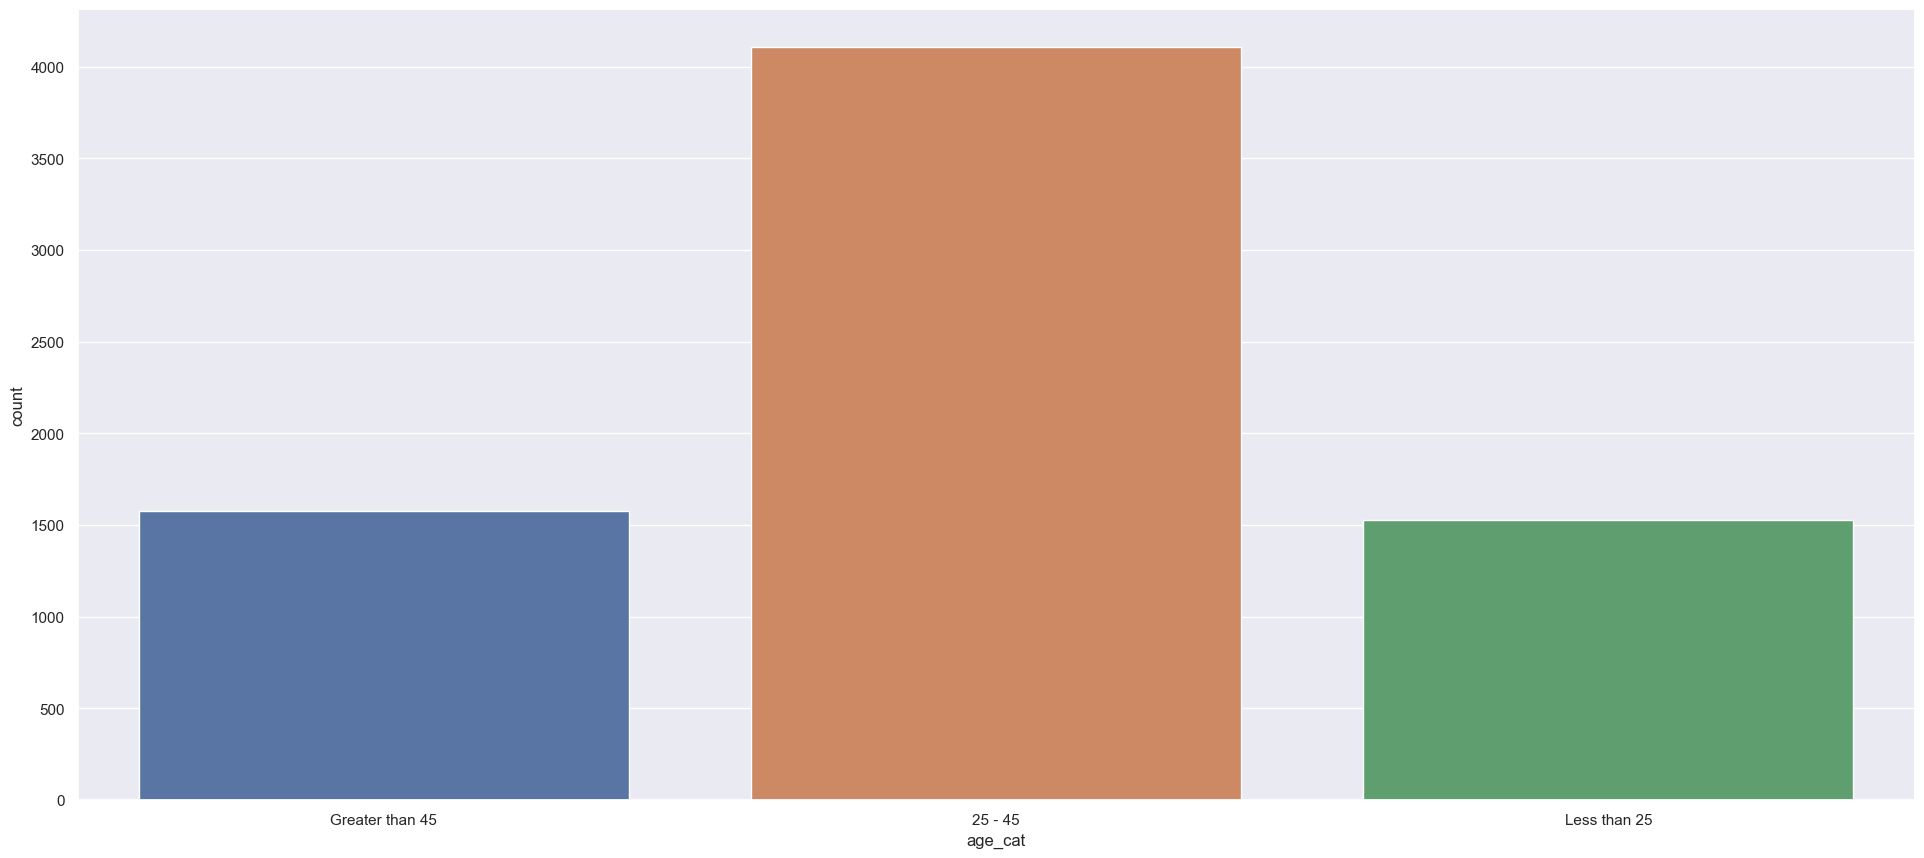

In [6]:
sns.countplot(x=df["age_cat"])
print(f'There are {df["age_cat"].tolist().count("Greater than 45")} people older than 45')
print(f'There are {df["age_cat"].tolist().count("25 - 45")} people older than 25, younger than 45')
print(f'There are {df["age_cat"].tolist().count("Less than 25")} people younger than 25')

<AxesSubplot:xlabel='age', ylabel='Count'>

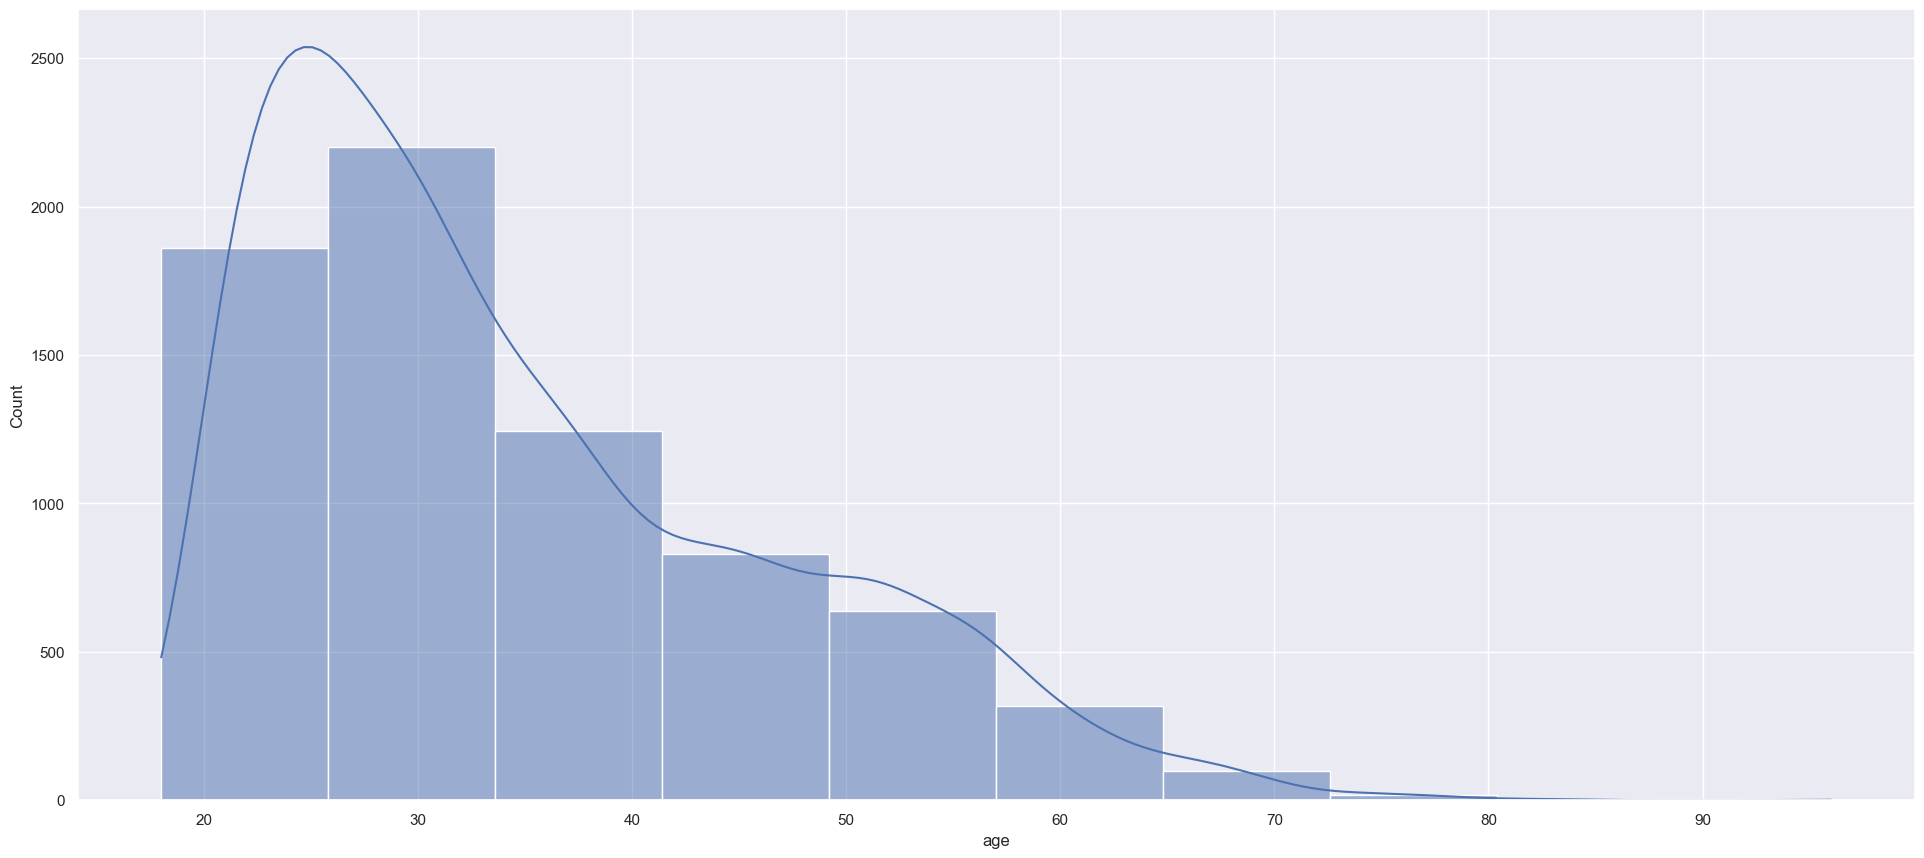

In [7]:
sns.histplot(x=df["age"], kde=True, bins=10)

<AxesSubplot:title={'center':'Jail Time after First Charge'}, xlabel='Days In Jail', ylabel='Age'>

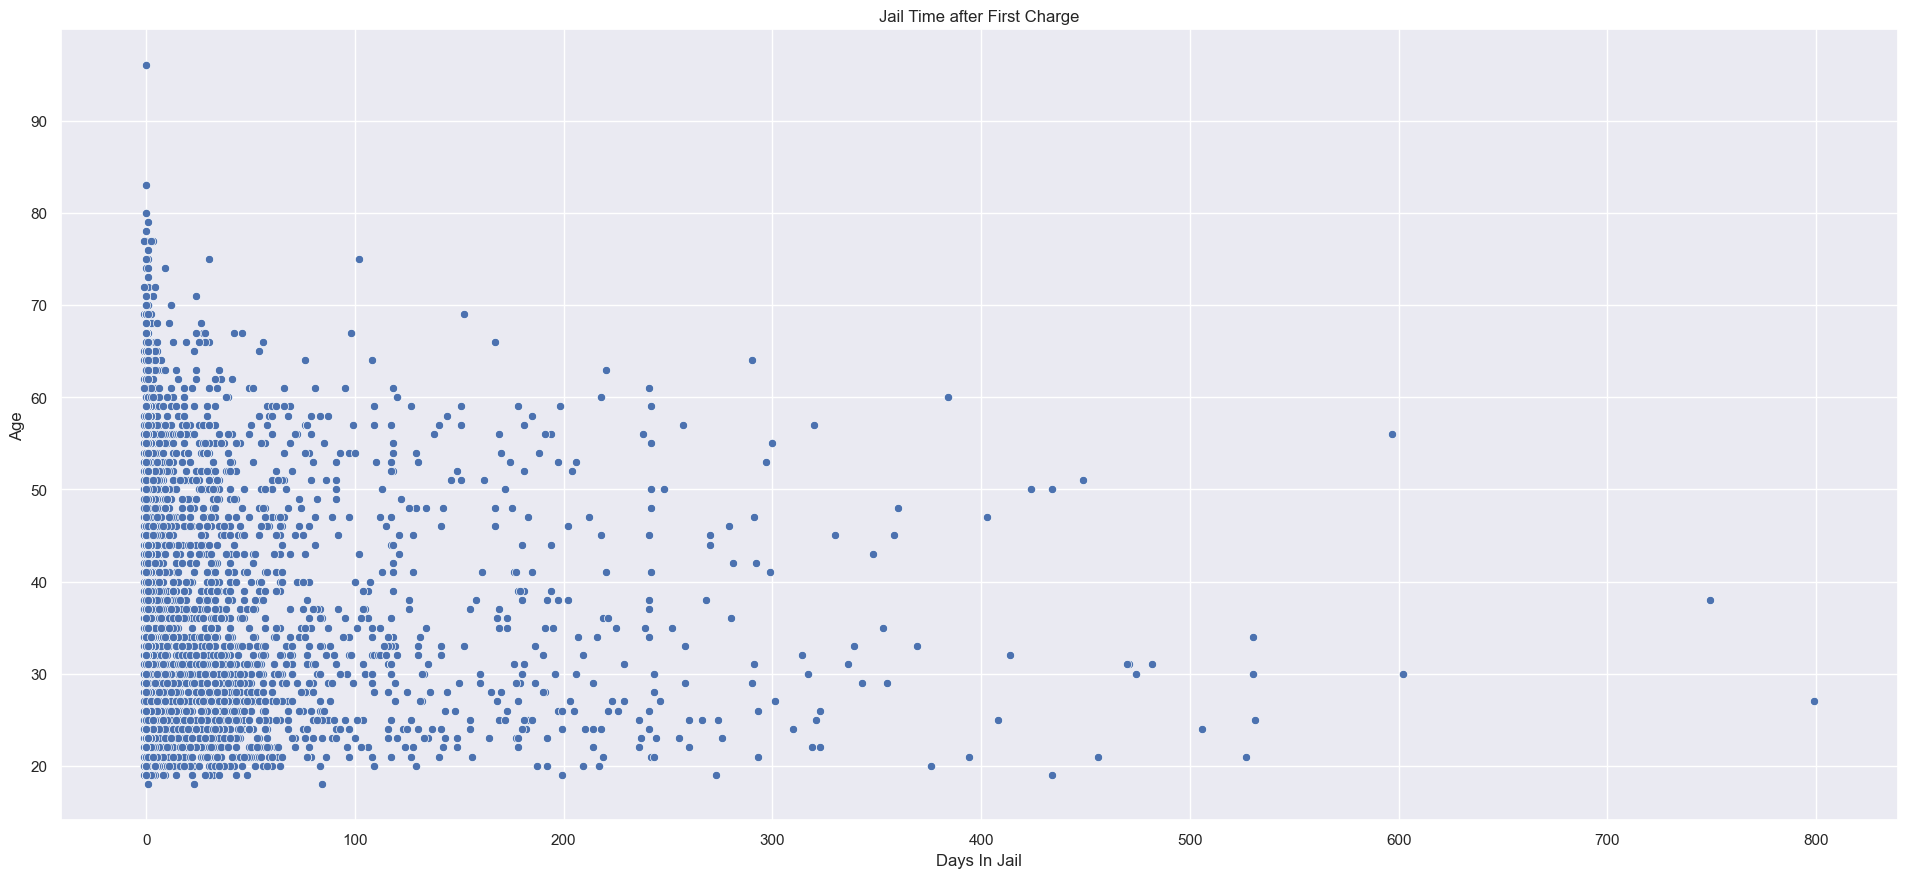

In [8]:
df['start_date'] = pd.to_datetime(df.iloc[:, 16], errors='coerce')
df['end_date'] = pd.to_datetime(df.iloc[:, 17], errors='coerce')
df['days_in_jail'] = (df['end_date'] - df['start_date']).dt.days.fillna(0).astype(int)
df.drop(['start_date', 'end_date'], axis=1, inplace=True)
SP = sns.scatterplot(data=df, x="days_in_jail", y="age")
SP.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time after First Charge")
SP

Asian: 32
Caucasian: 2454
Hispanic: 637
Native American: 18
African-American: 3696
Other: 377


<AxesSubplot:xlabel='race', ylabel='count'>

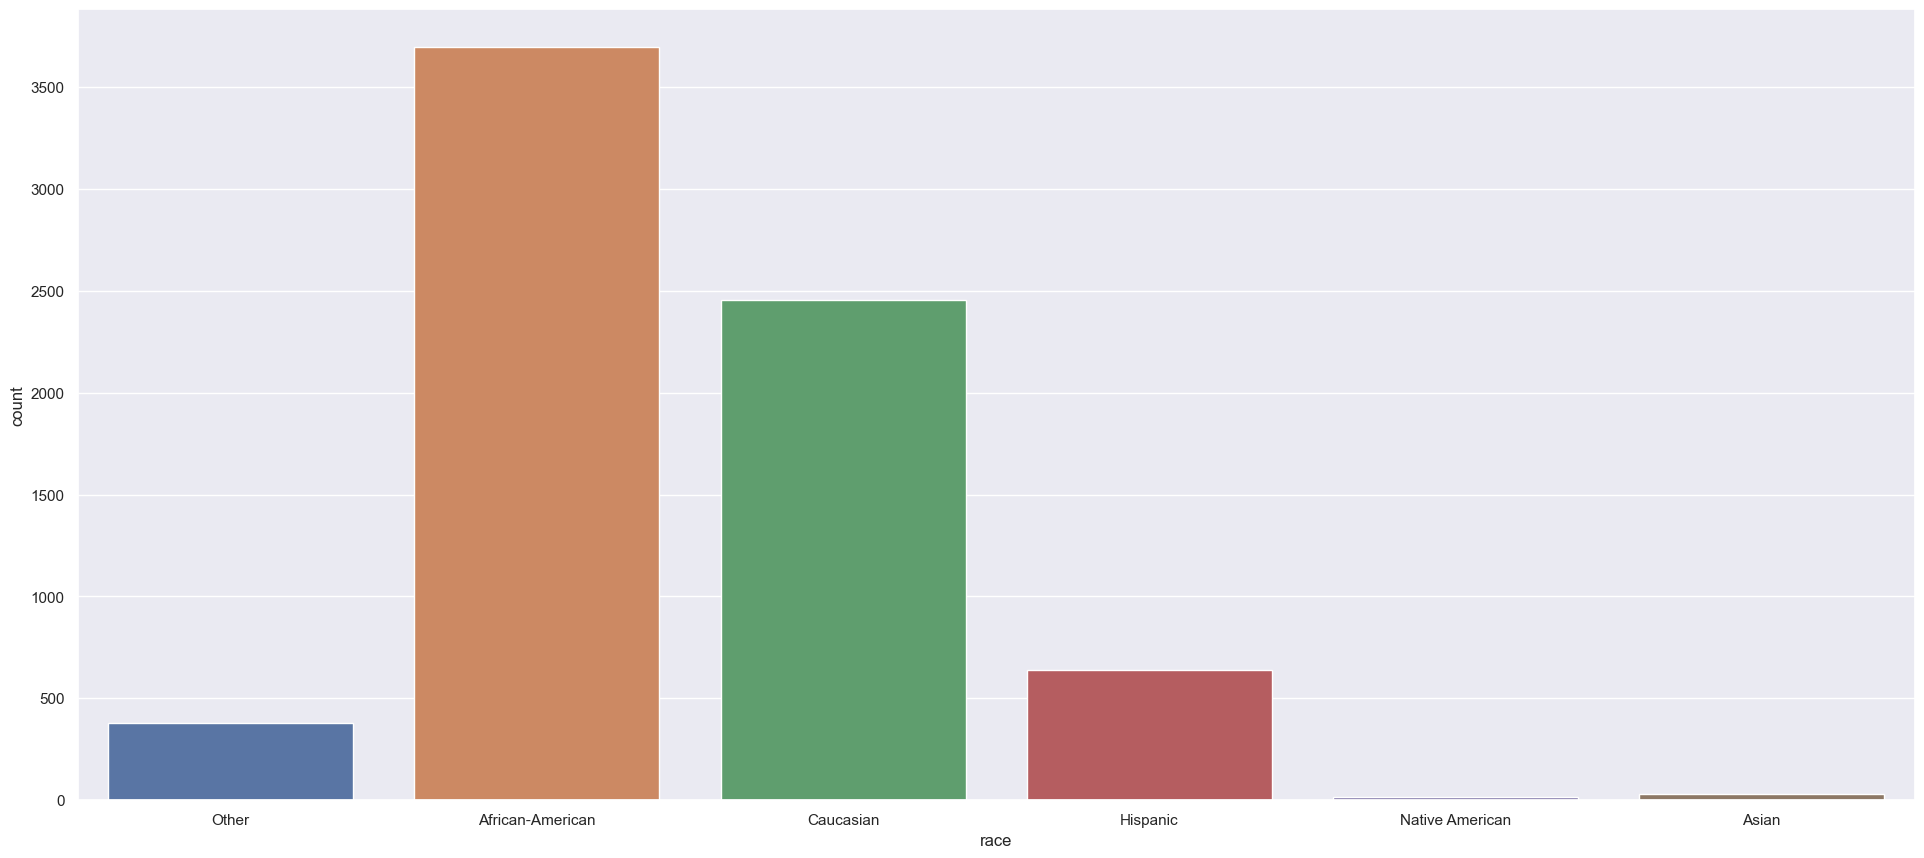

In [9]:
race_set = set(df["race"].unique())
race = list(race_set)

for i in race:
    count = df['race'].value_counts()[i]
    print(f'{i}: {count}')

sns.countplot(x=df["race"])

1: 1440
2: 941
3: 747
4: 769
5: 681
6: 641
7: 592
8: 512
9: 508
10: 383


<AxesSubplot:xlabel='decile_score', ylabel='count'>

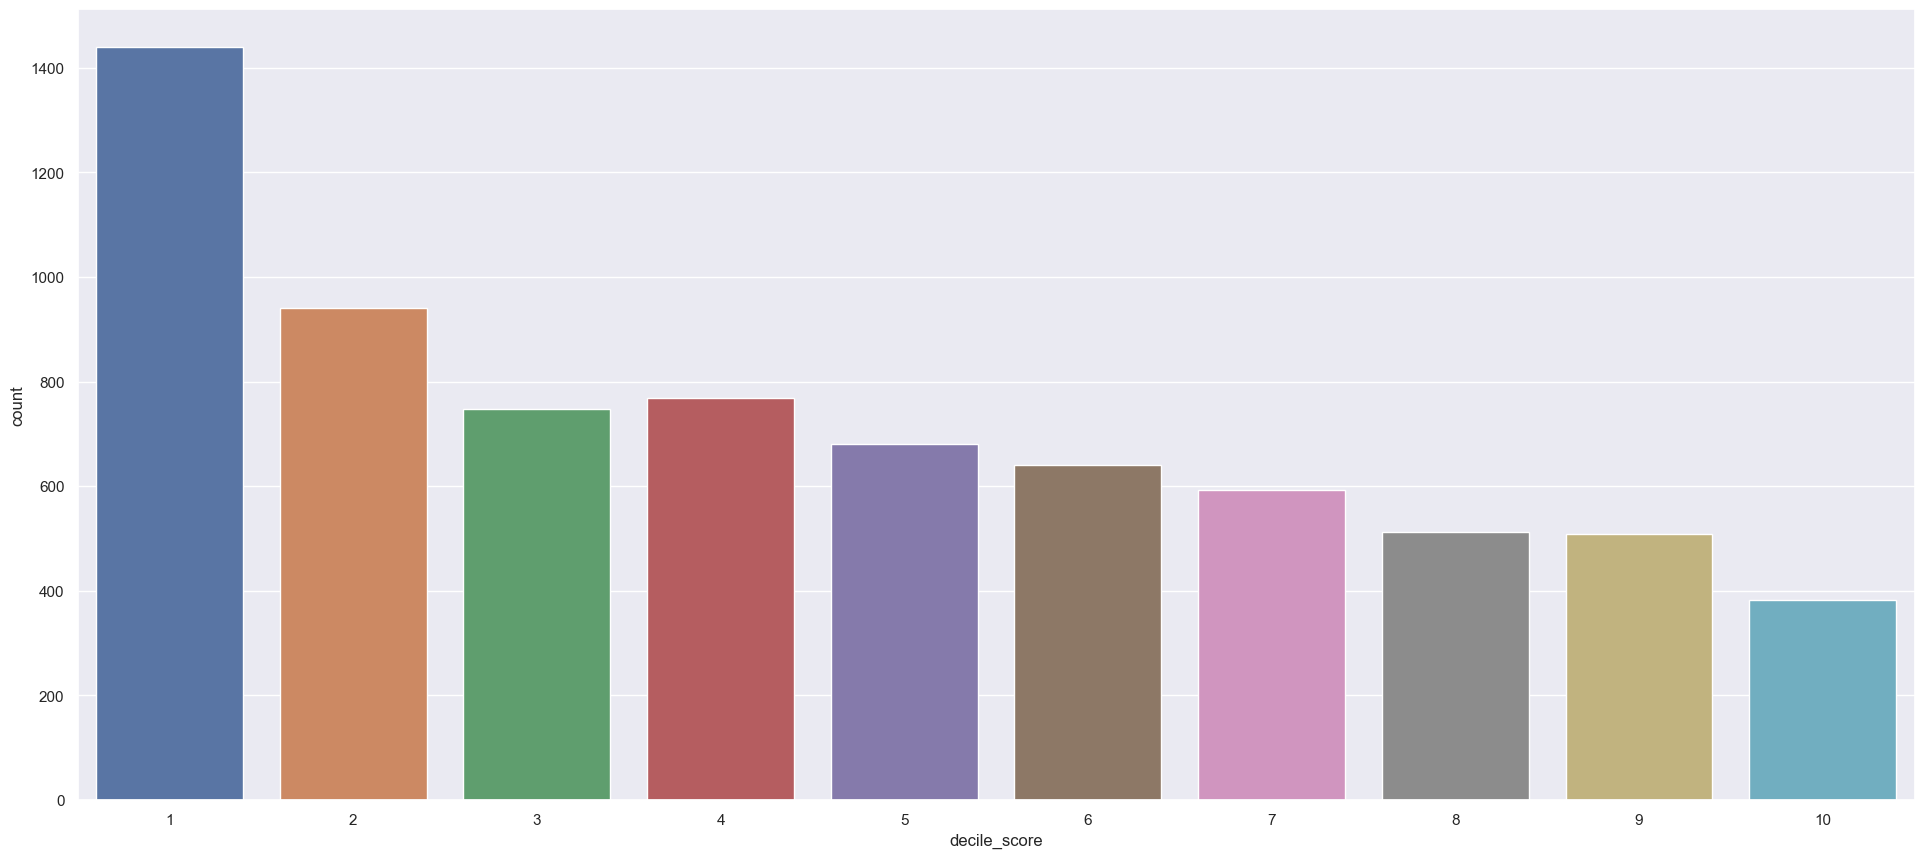

In [10]:
decile_score_set = set(df["decile_score"].unique())
decile_score = list(decile_score_set)

for i in decile_score:
    count = df['decile_score'].value_counts()[i]
    print(f'{i}: {count}')

sns.countplot(x=df["decile_score"])

<AxesSubplot:xlabel='decile_score', ylabel='count'>

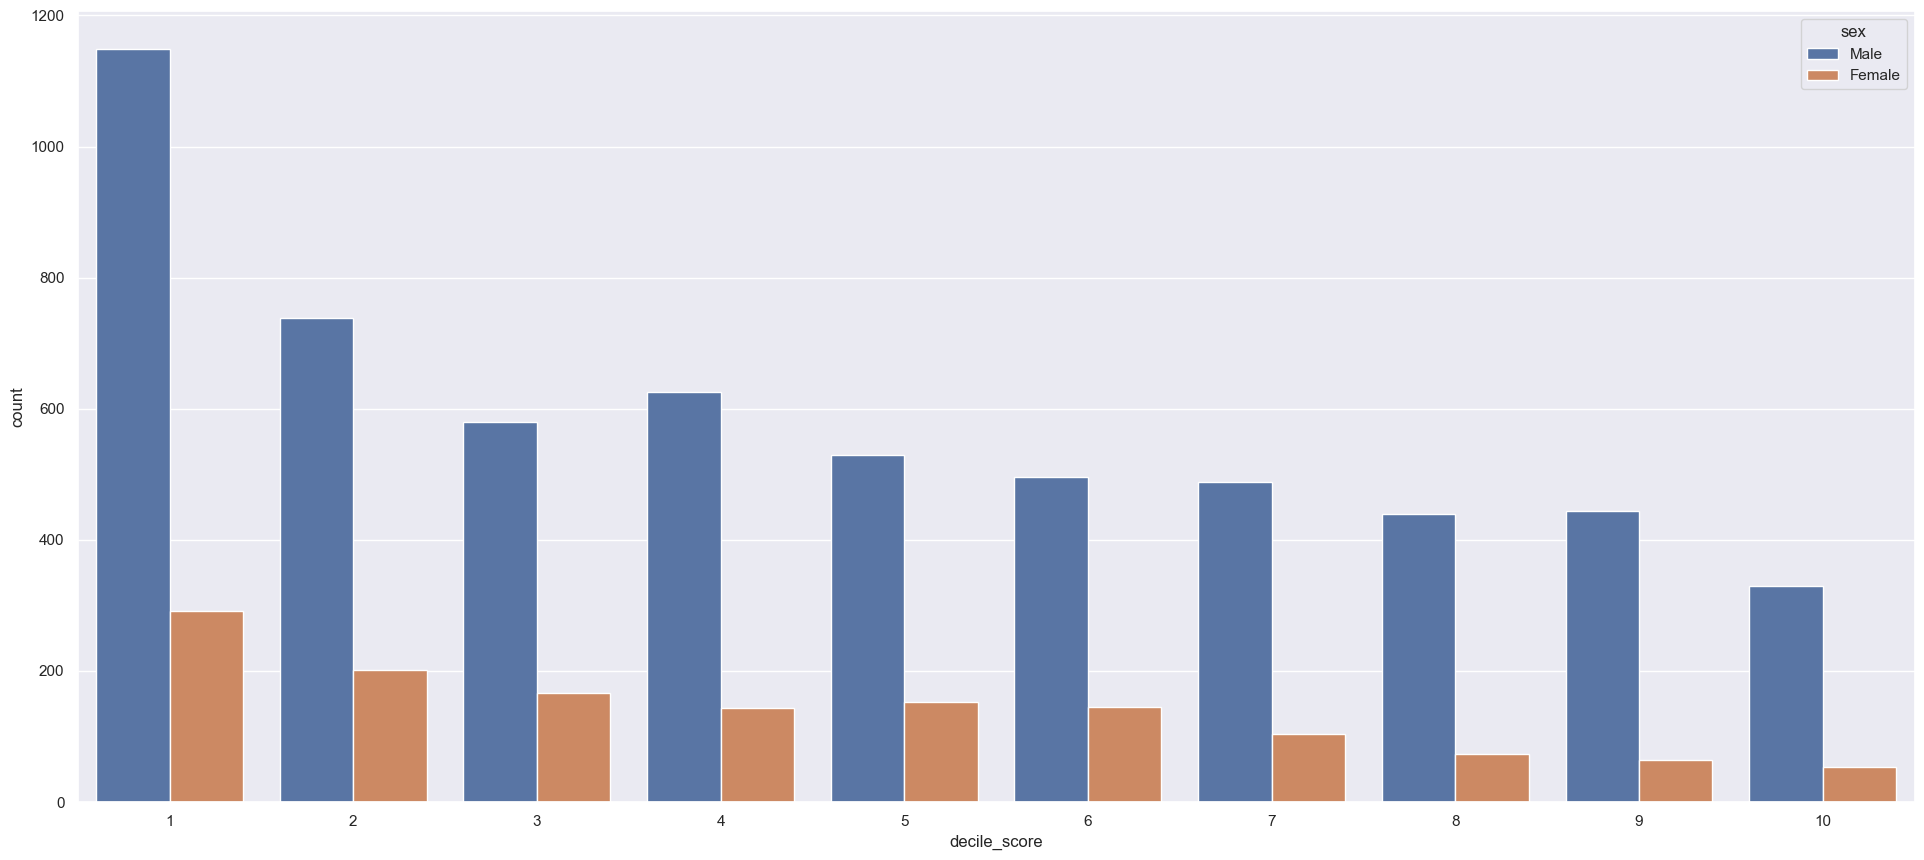

In [11]:
sns.countplot(x="decile_score", hue="sex", data=df)

<AxesSubplot:xlabel='age', ylabel='decile_score'>

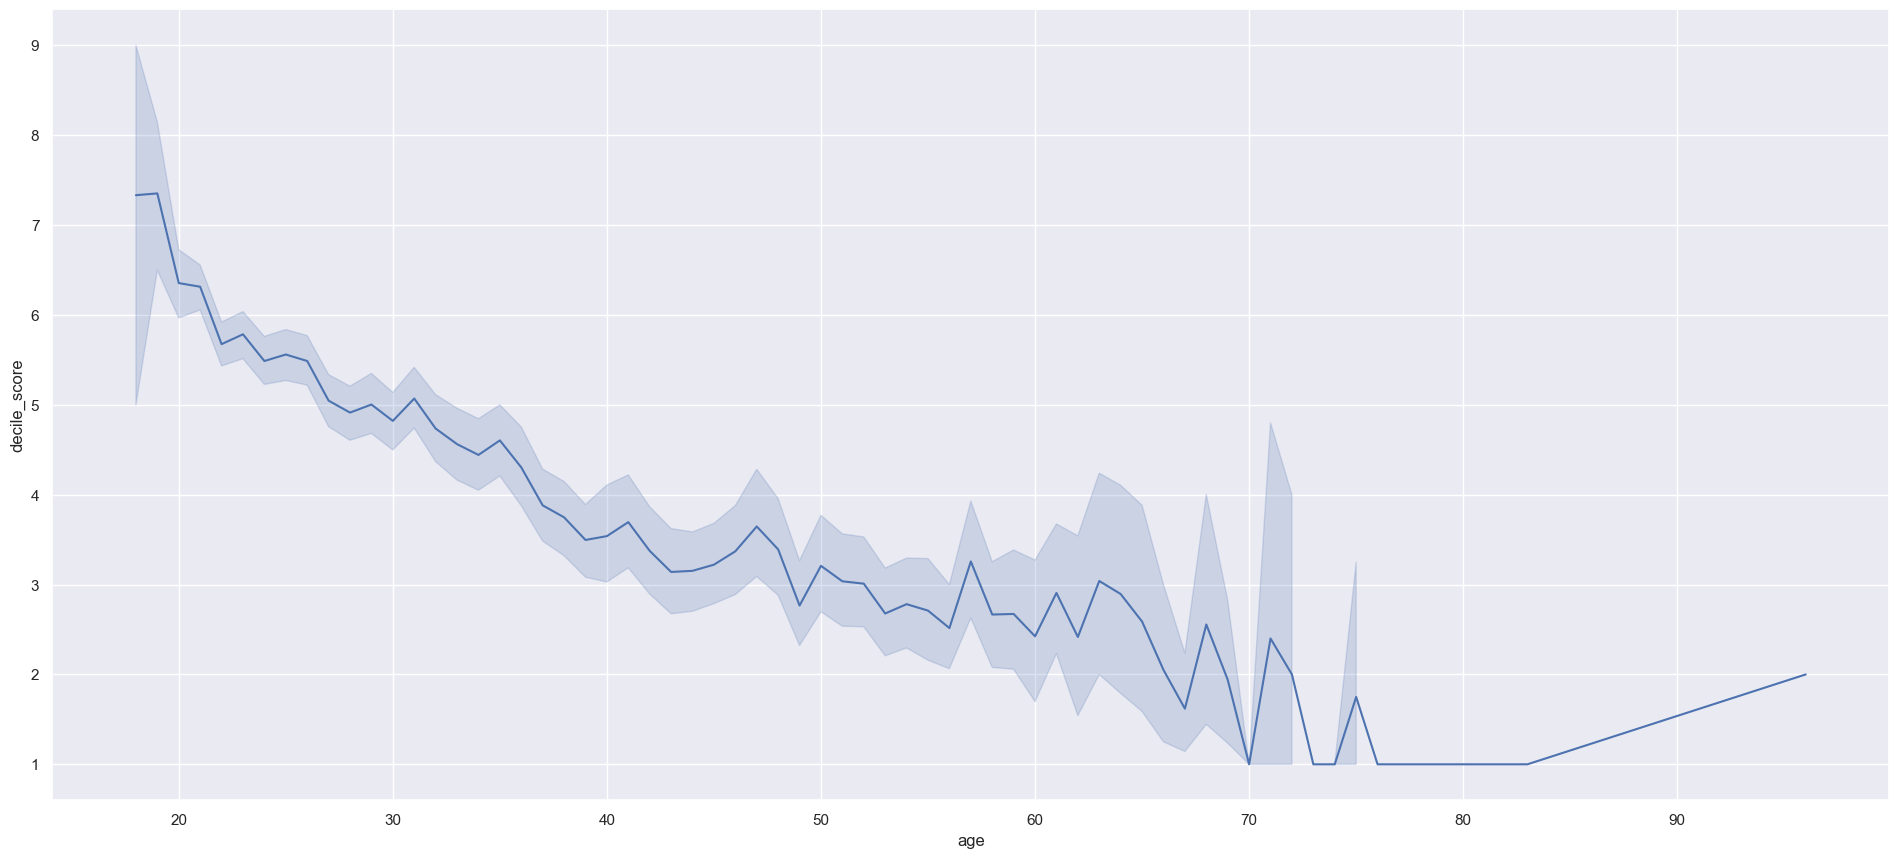

In [12]:
sns.lineplot(data=df, x="age", y="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='count'>

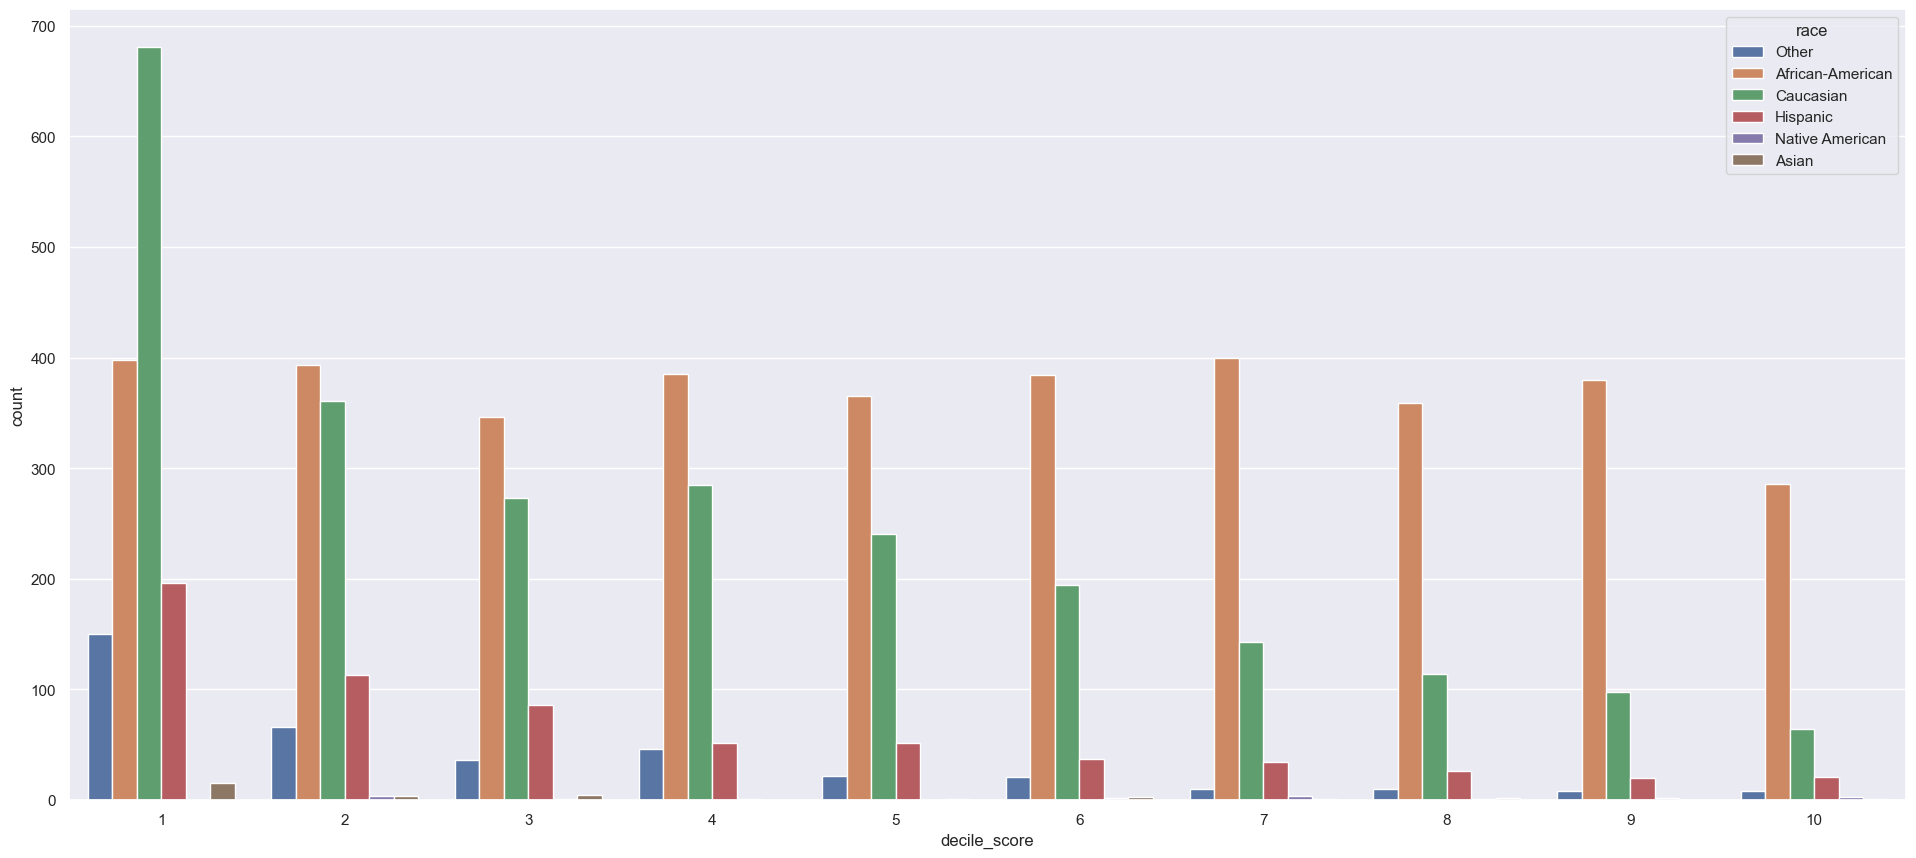

In [13]:
sns.countplot(data=df, x="decile_score", hue="race")

<AxesSubplot:xlabel='days_in_jail', ylabel='decile_score'>

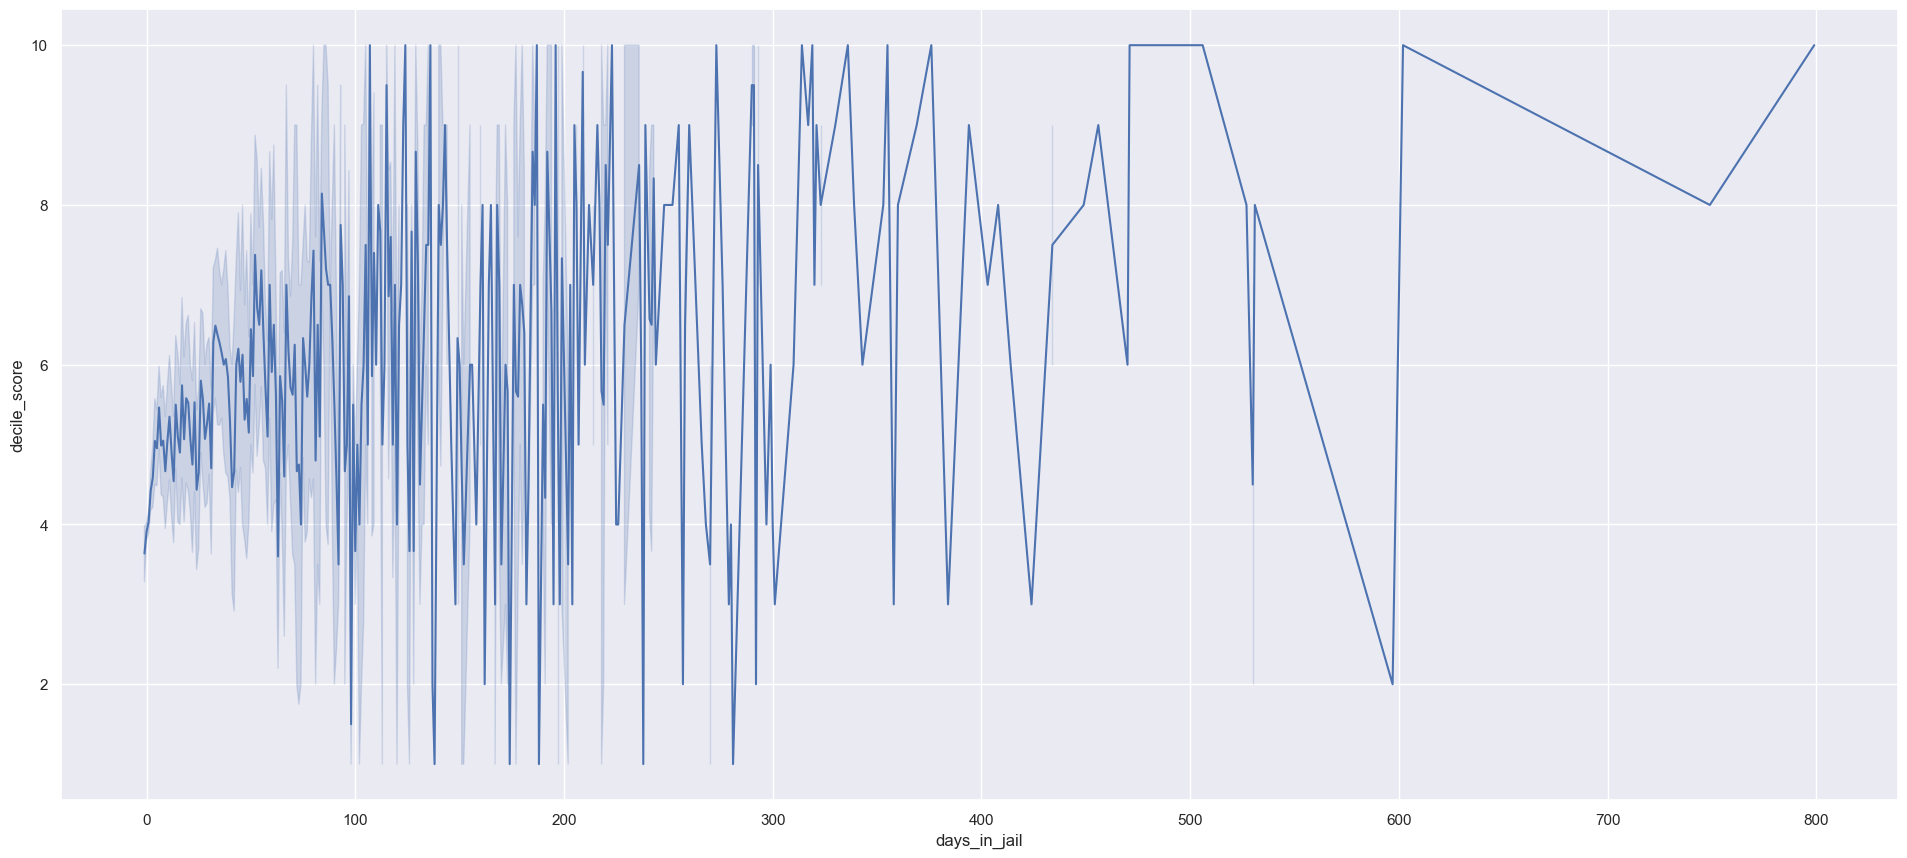

In [14]:
sns.lineplot(data=df, x="days_in_jail", y="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='days_in_jail'>

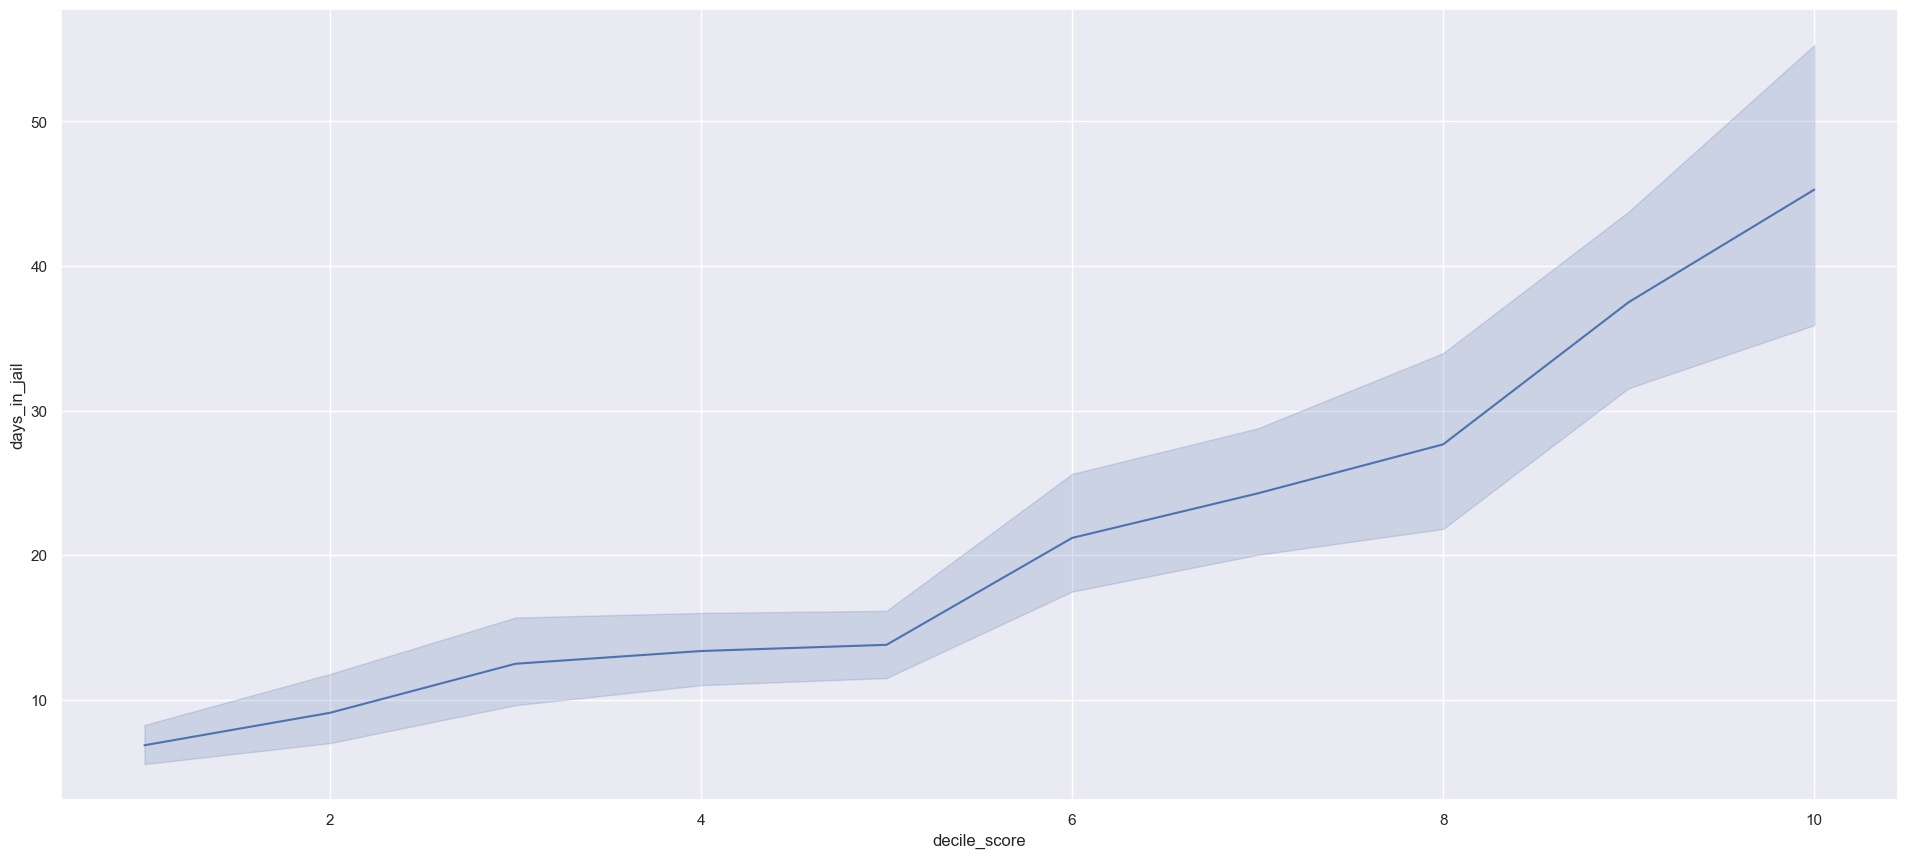

In [15]:
sns.lineplot(data=df, y="days_in_jail", x="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='two_year_recid'>

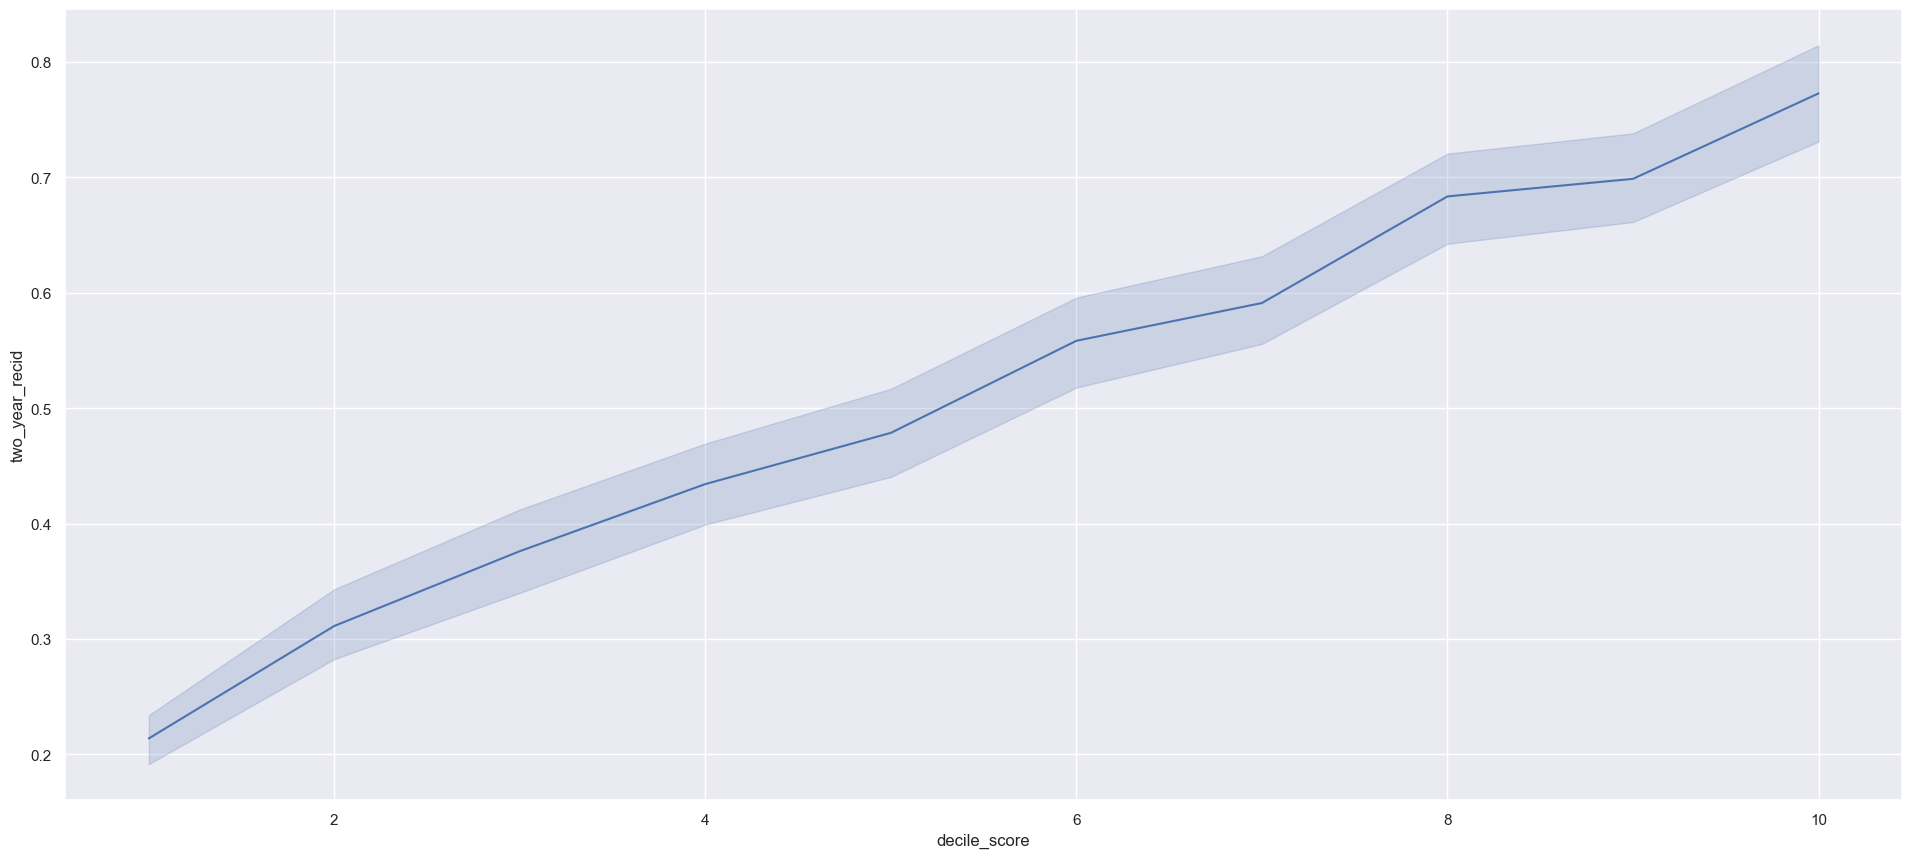

In [16]:
sns.lineplot(data=df, x="decile_score", y="two_year_recid")